In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [6]:
#split data into batches of 10000 points
batches10000 = [data[x:x+10000] for x in range(0, len(data), 10000)]

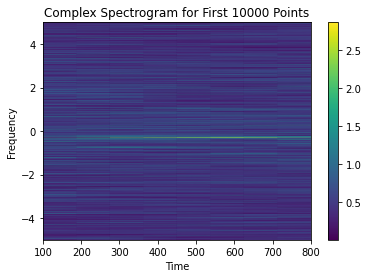

In [7]:
#complex spectrogram of first set of 10000 points
f, t, Sxx = signal.spectrogram(batches10000[0]-np.mean(batches10000[0]), 10, nperseg=2000, return_onesided=False, mode='complex')
plt.pcolormesh(t, fftshift(f), fftshift(abs(Sxx), axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Complex Spectrogram for First 10000 Points')
plt.show()

In [8]:
#Dividing each row of spectrogram Sxx by the average for each frequency 
normSxx=[]

for i in range(0,2000):
    normSxx.append(Sxx[i]/np.mean(Sxx[i]))
    

#checking this    
#print(len(normSxx))
#print(normSxx[0])
#print(normSxx[1])
#print(Sxx[0]/np.mean(Sxx[0]))
#print(Sxx[1]/np.mean(Sxx[1]))

In [9]:
#try taking absolute value of norm Sxx to plot spectrogram 
absnormSxx=[]

for i in range(0,2000):
    absnormSxx.append(abs(normSxx[i]))

In [10]:
print(absnormSxx[0])

[1.50230549 1.55842052 0.7137971  1.29214595 1.44345601]


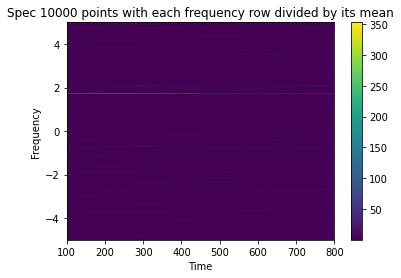

In [11]:
plt.pcolormesh(t, fftshift(f), fftshift(absnormSxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec 10000 points with each frequency row divided by its mean')
plt.show()

In [12]:
#want to take difference of complex values between time (x axis) and the next time
#product will be spectrogram of values for the time differences 

In [13]:
print(len(normSxx))
print(len(f))
print(len(t))
print(normSxx[0])

2000
2000
5
[1.35312092+0.65267568j 1.52837992+0.30451491j 0.1820733 +0.6901852j
 1.23282678-0.38701331j 0.70359907-1.26036249j]


In [14]:
#test code for finding differences before implementing on normSxx
thing=[[1,2,4,7,11],[6,7,9,12,16],[11,12,14,17,21]]
new=[]
slice0=[]

for i in range(0,5):
    slice0.clear()
    for j in range(0,3):
        slice0.append(thing[j][i])
    new.append(slice0[:])

print(new)
print(len(new))

diff1=[]

for j in range(0,3):
    for i in range(0,4):
        diff1.append(new[i+1][j]-new[i][j])


diff=[diff1[x:x+4] for x in range(0, len(diff1), 4)]
print(diff1)
print(diff)

[[1, 6, 11], [2, 7, 12], [4, 9, 14], [7, 12, 17], [11, 16, 21]]
5
[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]
[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]


In [19]:
#differencing for normSxx
#normSxx is 2000 rows each with 5 values since len(t) is 5
#I first change this to get 5 time columns each containing 2000 values


timecols=[]
tool=[]

for i in range(0,5):
    tool.clear()
    for j in range(0,len(normSxx)):
        tool.append(normSxx[j][i])
    timecols.append(tool[:])
    
#print(len(timecols))
#print(len(timecols[0]))

#do differencing to get list of differences and split this back into 2000 sections of 4 to plot

alldiffs=[]

for i in range(0,len(normSxx)):
    for j in range(0, 4):
        alldiffs.append(timecols[j+1][i]-timecols[j][i])
        
diffscols=[alldiffs[x:x+4] for x in range(0, len(alldiffs), 4)]
print(len(diffscols))
print(len(diffscols[0]))
print(diffscols[0])

2000
4
[(0.17525900047011178-0.34816076612024466j), (-1.3463066185783112+0.3856702877731601j), (1.0507534742868485-1.0771985100820376j), (-0.5292277032092207-0.8733491762884285j)]


In [16]:
#create time axis of matching dimension
print(t)
difft=np.delete(t,0)
print(difft)

[100. 275. 450. 625. 800.]
[275. 450. 625. 800.]


In [30]:
#taking absolute value of difference array to plot complex spectrogram 
absdiffscols=[]
tool2=[]

for i in range(0,2000):
    tool2.clear()
    for j in range(0,4):
        tool2.append(abs(diffscols[i][j]))
    absdiffscols.append(tool2[:])
    
print(len(absdiffscols))
print(len(absdiffscols[0]))

2000
4


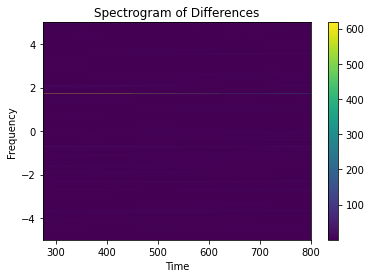

In [31]:
plt.pcolormesh(difft, fftshift(f), fftshift(absdiffscols, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram of Differences')
plt.show()